# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [2]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [16]:
# Load the provided .csv file with the used car data

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')
# oppure posso leggere il file tramite pandas anzichè csv.reader
linesread = pd.read_csv("data/km_year_power_price.csv")
# print(type(lines),type(linesread))
# uno è un csv.reader l'altro invece il dataframe di pandas 
# listcsv = list(linesread) 
# print(listcsv) castando a lista il data frame di pandas viene presa soltanto la prima riga del file quindi potrei scrivere:
listcsv = list(lines)
# usando del posso eliminare la prima riga contenente il nome delle classi 
#con pandas posso direttamente selezionare una colonna di un file csv e metterla in una lista il cui primo elemento è la classe corrispondente alla colonna nel file csv. Potrei proprio creare tante liste quante sono le colonne sfruttando un dizionario oppure in cui ad ogni classe assegno un indice per numerarle, oppure ocn enumerate applicato alla prima riga del file csv 

In [20]:
test_list = [[4, 5, 6, 8], 
             [2, 7, 10, 9], 
             [12, 16, 18, 20]]
# printing original list 
print ("The original list is : " + str(test_list)) 
# deleting row from a list 
del test_list[0]
print("the new list without the first row is : " + str(test_list))

The original list is : [[4, 5, 6, 8], [2, 7, 10, 9], [12, 16, 18, 20]]
the new list without the first row is : [[2, 7, 10, 9], [12, 16, 18, 20]]


Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




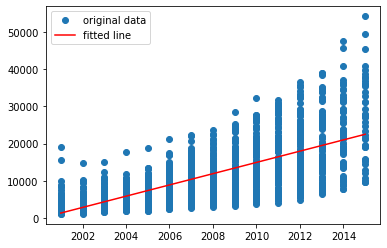

In [37]:
# linear regression with linregress (estimate price from year)
# quindi devo usare liregress per stimare il prezzo di una macchina a partire dall'anno in questo caso quindi mi servono due liste: quella degli anni e del prezzo (training sample)
# il data frame si chiama linesread
# per tradurre in array prima traduco in lista e poi casto con np in array. Pandas traduce direttamente in lista tramite il metodo nomedataframe.classe.to_oggetto() che seleziona una colonna in particolare tramite la classe a cui appartiene (header)
pricelist = linesread.avgPrice.to_list()
yearlist = linesread.year.to_list() 
# trasformiamo in numpy array, vengono restituiti vettori colonna
pricearray = np.array(pricelist)
yeararray = np.array(yearlist)
slope, intercept, r_value, p_value, std_err = stats.linregress(yeararray,pricearray) # stats.linregress prende come argomento i due set di dati x e y dei quali bisogna fare la linear regression. Sappiamo che i nostri dati sono vettori unidimensionali (d = 1)
plt.plot(yeararray,pricearray, 'o', label='original data')
plt.plot(yeararray, intercept + slope*yeararray, 'r', label='fitted line')
plt.legend()
# plt.show() serve quando il file è uno script eseguibile .py e apre una finestra contenente la figura a parte

[[1509.09382534]]


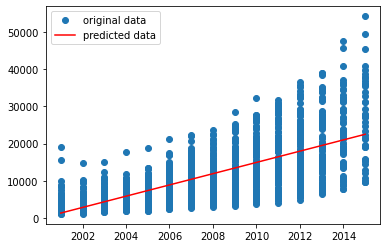

In [66]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# linear_model.LinearRegression() minimizza l'errore ottenuto dalla loss function mean squares 
# il metodo reshape con -1 all'interno permette di lasciare al numpy la possibilità di sistemare l'array in modo che sia compatibile con la configurazione iniziale. In questo caso ad esempio abbiamo bisogno che gli array siano vettori colonna quindi specifichiamo 1 mentre con -1 diciamo di costruire un array con tante righe quante sono compatibili con l'array di partenza. Fissando le colonne a una obblighiamo numpy a scrivere il vettore con tante righe quanti gli elementi in yeararray e pricearray 
model = linear_model.LinearRegression().fit(yeararray.reshape(-1,1),pricearray.reshape(-1,1))
pricepredict = model.intercept_ + model.coef_ * yeararray.reshape(-1,1) # model.coef_ teoricamente è un array di dimensione pari alle colonne che prendiamo in considerazione nella regressione lineare come dominio (d)
plt.plot(yeararray,pricearray, "o", label = "original data")
plt.plot(yeararray,pricepredict, "r", label = "predicted data")
plt.legend()


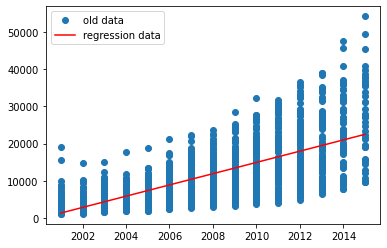

In [89]:
# linear regression with least squares (estimate price from year) (y,x)
# innanzitutto devo preparare i dati in coordinate omogenee. I coefficienti che devo ricavare w è un vettore dim=d+1 dove d è la dimensione dei vettori del dominio. Anche x avrà dim=d+1 e come prima componente si usa 1.
filename = "data/km_year_power_price.csv"
data = csv.reader(open(filename, newline = ""), delimiter = ",")
headers = next(data) 
datasnp = np.array(list(data)).astype(float) # in questo modo ho tutti i dati pronti in un array di dimensione tante righe quanti sono i dati e colonne quante le categorie. Passiamo in coordinate omogenne. Le x sono gli anni, per ciascuna riga devo aggiungere 1 come primo elemento quindi avrò un array di dimensione (np.shape(datasnp)[0],1+1) (+1 perchè siamo in coordinate omogenne)
n = np.shape(datasnp)[0]
xarray = np.zeros((n, 2))
xarray[:,0] = 1
xarray[:,1] = datasnp[:,1] # uno in datasnp perchè la colonna che dobbiamo prendere è quella degli anni che corrisponde alla seconda nell'array datasnp quindi indice 1
yarray = datasnp[:,3] # nella soluzione dei minimi quadrati non è necessario costruire il vettore delle labels in coordinate omogenne perchè nella formula devo comunque moltiplicare un array di samples-righe (1297) per l'array di x con due righe e 1297 colonne (trasposto rispetto a quello che abbiamo costruito)
# prima di tutto inizializziamo gli array A e b che servono per la soluzione 
A = np.dot(xarray.T, xarray) # che sono date dal prodotto di x per la sua trasposta quindi due righe per due colonne
b = np.dot(xarray.T, yarray) # sempre per il motivo della somma sugli indici saturati 
w = np.dot(np.linalg.inv(A), b) # la formula è w = A^-1*b 
plt.plot(datasnp[:,1], datasnp[:,3],"o", label = "old data") 
plt.plot(datasnp[:,1], w[0] + w[1]*datasnp[:,1],"r", label = "regression data")
plt.legend()

['km', 'year', 'powerPS', 'avgPrice']


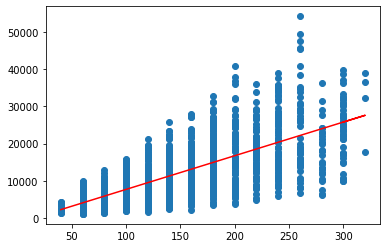

In [63]:
# linear regression with linregress (estimate price from power)

# prima di tutto carico i dati dal file csv. Mi sono reso conto della differenza tra delimiter e separator. Entrambi possono essere specificati come argomento di pd.read_csv(). Delimiter individua la differenza tra una riga e l'altra del file csv, solitamente un newline mentre il separator è il singolo separatore tra gli elementi di ciascuna riga di norma interpretato come virgola (Comma Separated Values, CSV).
# anzichè usare pandas per leggere il file e memorizzarlo in una lista o in array singoli si può usare direttamente la libreria csv
filename = "data/km_year_power_price.csv"
data = csv.reader(open(filename, newline = ""), delimiter = ",") # csv reader vuole come primo argomento un file handle dunque bisogna prima aprire il csv e assegnare un nome al filehandle
# prima di next print(['km', 'year', 'powerPS', 'avgPrice'] in data) ritorna true
headers = next(data) # posso prendere gli headers tramite il metodo next() che come argomento vuole un file handle. Questo metodo prende il file handle, legge la prima riga e passa alla successiva in modo che da quel momento in poi chiamando il file handle vengano considerate le righe dalla seconda all'ultima: print(headers in list(data)) infatti restituisce false, significa che proprio il file handle è andato avanti come riga
print(headers)
datas = list(data) # qua dentro non ci sono più i titoli alle colonne del csv.
datasnp = np.array(datas).astype(float) # per castare tutti i numeri a float altrimenti linregress non riesce a fare il fit
# nella linear regression devo prendere la colonna tre e quattro quindi datas[:,2] datas[:,3]
slope, intercept, r_value, p_value, std_err = stats.linregress(datasnp[:,2], datasnp[:,3])
plt.plot(datasnp[:,2], datasnp[:,3],"o", label = "original data")
plt.plot(datasnp[:,2], intercept + slope*datasnp[:,2],"r", label = "fit data")

slope coefficients: [1325.2284004    80.43004469]
intercept: -2661196.786749014


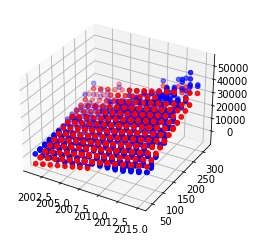

In [11]:
# Optional : 2D linear regression with linear model (estimate price from year and power)
# devo considerare come x le prime tre colonne cioè 
filename = "data/km_year_power_price.csv"
data = csv.reader(open(filename, newline = ""), delimiter = ",")
headers = next(data)
datanp = np.array(list(data)).astype(float)
yarray = datanp[:,3]
xarray = datanp[:,1:3]
reg = sl.linear_model.LinearRegression().fit(xarray,yarray)
print ('slope coefficients:',reg.coef_)
print ('intercept:', reg.intercept_)
# per rappresentare le predizioni così ottenute è necessario fare un grafico in 3-D dove reg.intercept_ rappresenta la quota lungo l'asse z mentre re.coef_ sono i due cofficienti angolari delle rette che separatamente correlano anni-prezzo e potenza-prezzo
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datanp[:,1], datanp[:,2], datanp[:,3], c='b') # c è il colore, si possono specificare anche la dimensione dei punti e altri dettagli 
ax.scatter(datanp[:,1], datanp[:,2], reg.intercept_+reg.coef_[0]*datanp[:,1]+reg.coef_[1]*datanp[:,2], c='r')
# poichè reg.coef_ è un array unidimensionale o uso reshape(-1,2)/newaxis per aggiungergli le righe oppure semplicemente lo considero come 1-D e moltiplico ciascuna x per la slope così da avere n punti predetti 